<a href="https://colab.research.google.com/github/100495982/ML_G84_Grupo2/blob/main/primera_pr%C3%A1ctica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Primera Práctica**

**Autores:**


---


Luis Enrique Valero Montero - Gr. 85 - 100495982

Isabelle Borgstedt - Gr. 84 - 100559990

# EDA Simplificado

Things to add to the EDA:
- Distribution graphs
- Outlier detection and analysis
- Covariance
- Median, min, max, and average of important attributes

We can always keep adding more to this later.

In [67]:
import pandas as pd
from tabulate import tabulate
df = pd.read_csv("attrition_availabledata_09.csv")

# ¿cuántas variables e instancias hay?
print("Hay " + str(df.shape[0]) + " instancias y " + str(df.shape[1]) + " variables.")
print("-------------------------------------------------------------------------------------------------------------------------------------")

# ¿qué variables son categóricas/ordinales/númericas?
cat_var = df.select_dtypes(include=['object']).columns.tolist()


def ordinales_o_numericas(df, threshold=5):
  num_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
  ord_var = []

  for col in num_var:
    unique_values = df[col].nunique()
    if unique_values <= threshold:
      ord_var.append(col)
    num_var = [x for x in num_var if x not in ord_var]
  return num_var, ord_var

print("Variables categóricas: ", cat_var)
print("Variables ordinales: ", ordinales_o_numericas(df)[1])
print("Variables numéricas: ", ordinales_o_numericas(df)[0])
print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿hay variables categóricas con alta cardinalidad?
def cardinalidad(df):
  cat_var = df.select_dtypes(include=['object']).columns.tolist()
  cardinalidad = {col: df[col].nunique() for col in cat_var}
  cardinalidad_df = pd.DataFrame(list(cardinalidad.items()), columns=['Variable', 'Unique Values'])
  cardinalidad_df = cardinalidad_df.sort_values(by="Unique Values", ascending=False)
  return cardinalidad_df

print("Variables con alta cardinalidad: ")
cardinalidad_df = cardinalidad(df)
print(cardinalidad_df)
print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿qué variables tienen valores faltantes y cuántos?
def faltantes(df):
  datos_faltantes = df.isnull().sum()
  datos_faltantes = datos_faltantes[datos_faltantes > 0]
  faltantes_df = pd.DataFrame({
      "Variable:": datos_faltantes.index,
      "Valores faltantes:": datos_faltantes.values,
      "Porcentaje faltantes:": datos_faltantes.values / len(df) * 100
  })
  faltantes_df = faltantes_df.sort_values(by="Porcentaje faltantes:", ascending=False)
  return faltantes_df

print("Variables con valores faltantes: ")
faltantes_df = faltantes(df)
print(faltantes_df)
print("-------------------------------------------------------------------------------------------------------------------------------------")

# ¿hay columnas constantes o columnas de ID?
def constantes(df):
  constantes = []
  for col in df.columns:
    if df[col].nunique() == 1:
      constantes.append(col)
  return constantes

print("Columnas constantes: ", constantes(df))

def id(df):
  id_cols = []
  for col in df.columns:
    if df[col].nunique() == len(df):
      id_cols.append(col)
  return id_cols

print("Columnas de ID: ", id(df))
print("-------------------------------------------------------------------------------------------------------------------------------------")


# ¿se trata de un problema de regresión o clasificación?
print("Se trata de un problema de clasificación porque el attributo'Attrition' tiene dos posibles valores categoricos discretos: Sí o No.")
print("-------------------------------------------------------------------------------------------------------------------------------------")


# si es clasificación, ¿está desbalanceado?
print(df["Attrition"].value_counts(normalize=True))
print("Está desbalanceado.")
print("-------------------------------------------------------------------------------------------------------------------------------------")


# definir variables numéricas
numerical_vars, ordinal_vars = ordinales_o_numericas(df)

print("Estadísticas descriptivas para las variables numéricas:")
df_num_desc = df[numerical_vars].describe().transpose().round(2)
df_num_desc.insert(0, "Variable", df_num_desc.index)
print(tabulate(df_num_desc, headers='keys', tablefmt='pretty', showindex=False))


print("Análisis descriptivo para las variables categóricas:")
for col in cat_var:
    print(f"\nDistribución de {col}:")
    df_cat = df[col].value_counts(normalize=True).mul(100).round(2).reset_index()
    df_cat.columns = [col, 'Percentage']
    print(tabulate(df_cat, headers='keys', tablefmt='pretty', showindex=False))


Hay 2940 instancias y 31 variables.
-------------------------------------------------------------------------------------------------------------------------------------
Variables categóricas:  ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'Attrition']
Variables ordinales:  ['JobInvolvement', 'PerformanceRating', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Education', 'EmployeeCount', 'JobLevel', 'StandardHours', 'StockOptionLevel']
Variables numéricas:  ['hrs', 'absences', 'Age', 'DistanceFromHome', 'EmployeeID', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
-------------------------------------------------------------------------------------------------------------------------------------
Variables con alta cardinalidad: 
         Variable  Unique Values
4         JobRole            

Vamos a encontrar "outliers" para determinar las mejores opciones para escalado y imputación.


Outliers using Z-Score:
                   Column  Outlier Index   Z-Score
0       TotalWorkingYears             50  3.248904
1       TotalWorkingYears            185  3.122043
2       TotalWorkingYears            248  3.122043
3       TotalWorkingYears            292  3.122043
4       TotalWorkingYears            386  3.122043
..                    ...            ...       ...
168  YearsWithCurrManager           2293  3.554717
169  YearsWithCurrManager           2414  3.554717
170  YearsWithCurrManager           2424  3.554717
171  YearsWithCurrManager           2583  3.001849
172  YearsWithCurrManager           2731  3.001849

[173 rows x 3 columns]

Outliers using IQR Method:
                    Column  Outlier Index  IQR Method
0                      hrs             12   10.666170
1                      hrs             25   10.389476
2                      hrs             51   10.433987
3                      hrs             64   10.907255
4                      hrs            214

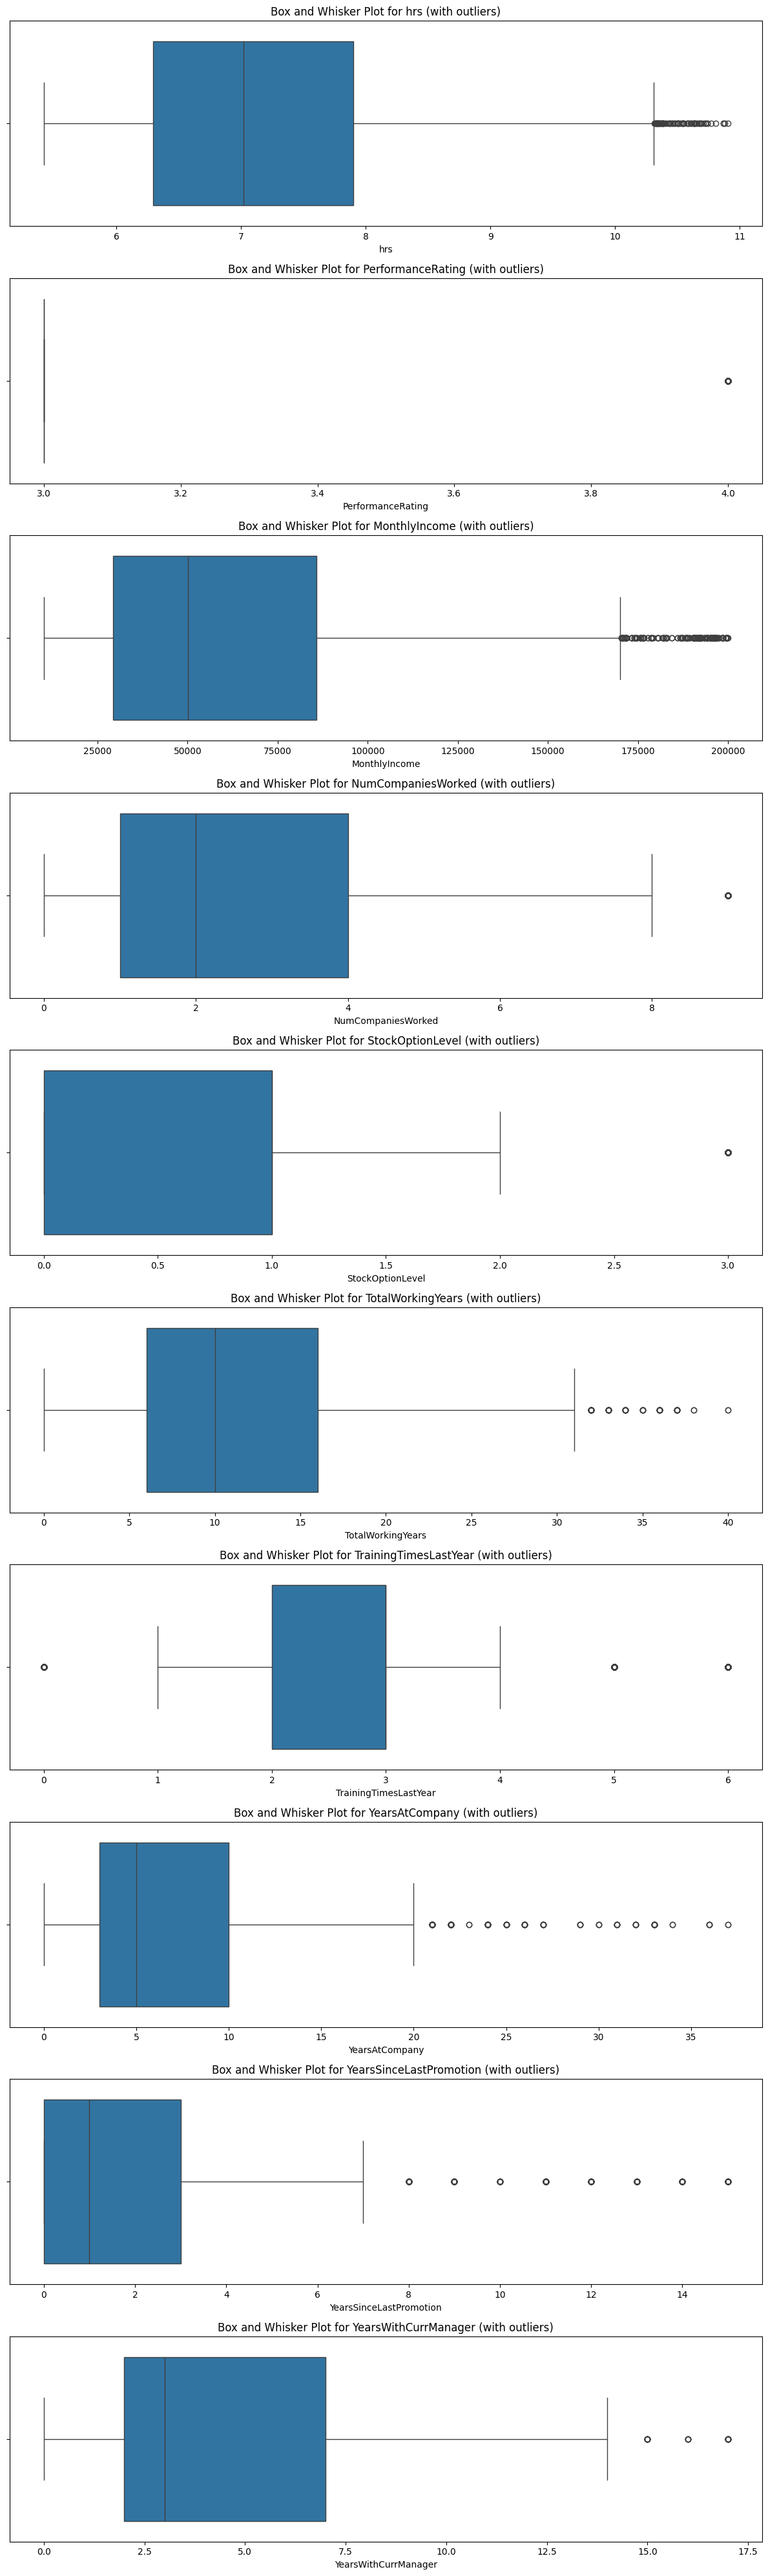

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

# outliers con z-score
def zscore_outliers(df, threshold=3):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_list = []

    for col in numerical_cols:
        z_scores = zscore(df[col].dropna())
        outlier_indices = np.where(np.abs(z_scores) > threshold)[0]
        outlier_values = df[col].iloc[outlier_indices]
        for idx, value in zip(outlier_indices, outlier_values):
            outliers_list.append({"Column": col, "Outlier Index": idx, "Z-Score": z_scores[idx]})

    outliers = pd.DataFrame(outliers_list)
    return outliers

# outliers con IQR
def iqr_outliers(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    outliers_list = []

    for col in numerical_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outlier_values = df[col].loc[outlier_indices]

        for idx, value in zip(outlier_indices, outlier_values):
            outliers_list.append({"Column": col, "Outlier Index": idx, "IQR Method": value})

    outliers = pd.DataFrame(outliers_list)
    return outliers

outliers_zscore = zscore_outliers(df)
print("\nOutliers using Z-Score:")
print(outliers_zscore)

outliers_iqr = iqr_outliers(df)
print("\nOutliers using IQR Method:")
print(outliers_iqr)

# outliers con box & whiskers
def plot_boxplots_with_outliers(df):
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    cols_with_outliers = []

    for col in numerical_cols:
        col_data = df[col].dropna()
        q1, q3 = np.percentile(col_data, [25, 75])
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        if ((col_data < lower_bound) | (col_data > upper_bound)).any():
            cols_with_outliers.append(col)

    if not cols_with_outliers:
        print("No numerical columns with outliers found.")
        return

    # solo muestra los plots con outliers
    plt.figure(figsize=(12, len(cols_with_outliers) * 4))
    for i, col in enumerate(cols_with_outliers, 1):
        plt.subplot(len(cols_with_outliers), 1, i)
        sns.boxplot(x=df[col])
        plt.title(f'Box and Whisker Plot for {col} (with outliers)')
        plt.xlabel(col)

    plt.tight_layout()
    plt.show()

plot_boxplots_with_outliers(df)

# Preproceso

In [69]:
# quitar los parámetros constantes y únicos
constantes_cols = constantes(df)
id_cols = id(df)

# combinar las columnas para dejar y dejarlas
columns_to_drop = constantes_cols + id_cols

# eliminar las columnas
df = df.drop(columns=columns_to_drop)

# imprimir las columnas que se quedan
print("Remaining columns: ", df.columns)

Remaining columns:  Index(['hrs', 'absences', 'JobInvolvement', 'PerformanceRating',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'Attrition'],
      dtype='object')


# Evaluacion de Rendimiento Futuro

Función auxiliar que calcula todas las métricas importantes del matrix de confusión.

In [70]:
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

def evaluate_model_train(model, X_train, y_train):
    """
    evaluar el model con balanced accuracy, TPR, TNR, y matrix de confusión con los datos de entrenamiento.
    """
    y_pred = model.predict(X_train)

    balanced_acc = balanced_accuracy_score(y_train, y_pred)
    overall_acc = accuracy_score(y_train, y_pred)
    cm = confusion_matrix(y_train, y_pred)

    # encontrar TPR y TNR
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)  # recall
    tnr = tn / (tn + fp)  # specificity

    # imprimir los resultados
    print(f"Balanced Accuracy (Train): {balanced_acc:.4f}")
    print(f"Overall Accuracy (Train): {overall_acc:.4f}")
    print(f"True Positive Rate (TPR) (Train): {tpr:.4f}")
    print(f"True Negative Rate (TNR) (Train): {tnr:.4f}")
    print("\nConfusion Matrix (Train):")
    print(cm)
    print("\nClassification Report (Train):")
    print(classification_report(y_train, y_pred))

# Metodos Basicos: KNN y Árboles

KNN:

ÁRBOLES:

Vamos a empezar con los métodos de escalado y imputación. Elegimos imputación usando la mediana y escalado usando RobustScaler porque tenemos outliers. También medimos el tiempo de entrenar el modelo.

Aquí también estamos separando los datos con Holdout: 2/3 train y 1/3 test. Debemos garantizar que los datos para "test" solo son usados para el rendimiento final. Es importante que mantengamos el balance cuando dividimos los datos: 83.9% "no" y 16.1% "yes".

Por último, realizamos la evaluación de inner antes de HPO y analizamos las métricas de accuracy.

In [71]:
import time
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    classification_report,
    confusion_matrix,
)

# preproceso
target = "Attrition"
X = df.drop(columns=[target])
y = df[target]

# escalado y imputación
X_encoded = pd.get_dummies(X, drop_first=True).astype(float)
X_imputed = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X_encoded), columns=X_encoded.columns)
X_scaled = pd.DataFrame(RobustScaler().fit_transform(X_imputed), columns=X_imputed.columns)

# separar el outer
X_outer_train, X_outer_test, y_outer_train, y_outer_test = train_test_split(
    X_scaled, y, test_size=1/3, stratify=y, random_state=559990
)
inner = StratifiedKFold(n_splits=3, shuffle=True, random_state=559990)

# evaluación de inner antes de HPO
print("Evaluación del modelo antes de HPO con inner:")
model = DecisionTreeClassifier(random_state=559990)

start_time = time.time()
cv_scores = cross_val_score(model, X_outer_train, y_outer_train, cv=inner, scoring='accuracy')
end_time = time.time()
print(f"Cross-validated Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})")
print(f"Cross-validation Time: {end_time - start_time:.4f} seconds")

model.fit(X_outer_train, y_outer_train)
y_pred = model.predict(X_outer_train)
cm = confusion_matrix(y_outer_train, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0

print(f"Overall Accuracy: {accuracy_score(y_outer_train, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_outer_train, y_pred):.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print("Confusion Matrix:\n", cm)

Evaluación del modelo antes de HPO con inner:
Cross-validated Accuracy: 0.8684 (+/- 0.0033)
Cross-validation Time: 0.0628 seconds
Overall Accuracy: 1.0000
Balanced Accuracy: 1.0000
True Positive Rate (TPR): 1.0000
True Negative Rate (TNR): 1.0000
Confusion Matrix:
 [[1644    0]
 [   0  316]]


Esta matrix de confusión muestra overall accuracy, balanced accuracy, TPR y TNR. Está claro que todos los accuracies antes de HPO son 1.0000. Es posible que es un resultado de sobreajuste. En este caso, el modelo está aprendindo el ruido en vez de las tendencias reales de los datos.

Entonces, vamos a realizar HPO usando GridSearch.

In [88]:
from sklearn.model_selection import GridSearchCV

# grid search
print("Evaluación del modelo después de HPO con inner:")
param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_model = DecisionTreeClassifier(random_state=559990)
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=inner, scoring='accuracy', n_jobs=-1)

start_time = time.time()
grid_search.fit(X_outer_train, y_outer_train)
end_time = time.time()
print(f"Training time: {end_time - start_time:.4f} seconds")
print(f"Best hyperparameters: {grid_search.best_params_}")

# evaluar el modelo con grid search / HPO
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_outer_train)
cm = confusion_matrix(y_outer_train, y_pred)
TN, FP, FN, TP = cm.ravel()
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0

print(f"Overall Accuracy: {accuracy_score(y_outer_train, y_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_outer_train, y_pred):.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print("Confusion Matrix:\n", cm)


Evaluación del modelo después de HPO con inner:
Training time: 4.1542 seconds
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}
Overall Accuracy: 0.9735
Balanced Accuracy: 0.9279
True Positive Rate (TPR): 0.8608
True Negative Rate (TNR): 0.9951
Confusion Matrix:
 [[1636    8]
 [  44  272]]


Podemos notar una pequeña diferencia entre los porcentajes de TPR y TNR. Los datos demuestran que el rendimiento del modelo es ~13% mejor para los casos de "No" que los casos de "Yes".



Vamos a mostrar las diferencias entre los hiperparámetros con gráficos. Esto demuestra las combinaciones de los hiperparámetros mejores y peores de max_depth, min_samples_split, y min_samples_leaf.

Top 3 combinations:
     max_depth  min_samples_leaf  min_samples_split  mean_test_score
12         10                 2                  2         0.870913
27         20                 1                  2         0.868366
31         20                 2                  5         0.868360


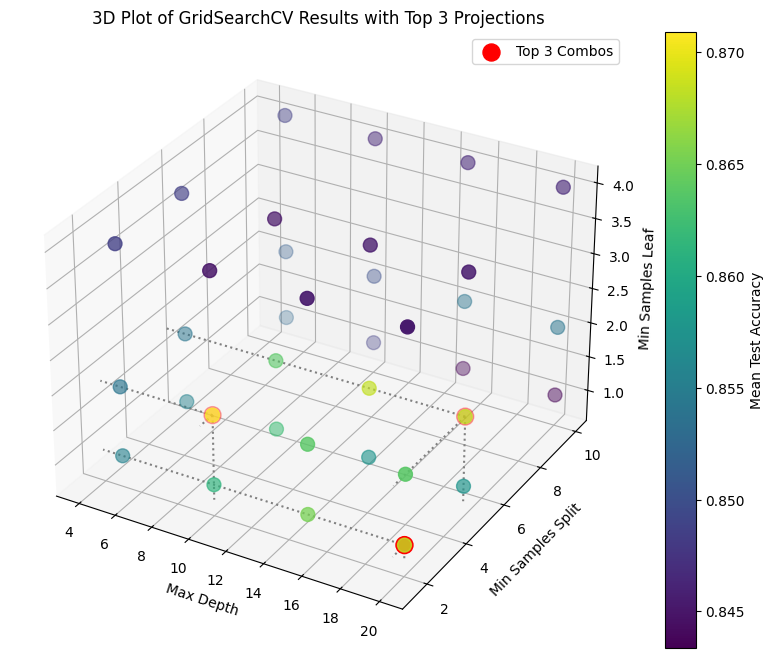

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

param_list = results['params']
scores = results['mean_test_score']
df_results = pd.DataFrame(param_list)
df_results['mean_test_score'] = scores

# filtros y conversiones
df_plot = df_results[df_results['max_depth'].notnull()].copy()
df_plot['max_depth'] = df_plot['max_depth'].astype(int)

# los mejores 3 combinaciones
df_top3 = df_plot.sort_values(by='mean_test_score', ascending=False).head(3)
print("Top 3 combinations:\n", df_top3)

# 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# ejes: x=max_depth, y=min_samples_split, z=min_samples_leaf, color = mean_test_score
x = df_plot['max_depth']
y = df_plot['min_samples_split']
z = df_plot['min_samples_leaf']
c = df_plot['mean_test_score']

sc = ax.scatter(x, y, z, c=c, cmap='viridis', s=100)
fig.colorbar(sc, label='Mean Test Accuracy')

top_x = df_top3['max_depth'].values
top_y = df_top3['min_samples_split'].values
top_z = df_top3['min_samples_leaf'].values
ax.scatter(top_x, top_y, top_z, color='red', s=150, marker='o', label='Top 3 Combos')

# los límites de los ejes
x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
z_min, z_max = ax.get_zlim()

# líneas punteadas para la profunidad
for xi, yi, zi in zip(top_x, top_y, top_z):
    ax.plot([xi, xi], [yi, yi], [zi, z_min], linestyle=':', color='gray')
    ax.plot([xi, xi], [yi, y_min], [zi, zi], linestyle=':', color='gray')
    ax.plot([xi, x_min], [yi, yi], [zi, zi], linestyle=':', color='gray')

# etiquetas para los ejes
ax.set_xlabel('Max Depth')
ax.set_ylabel('Min Samples Split')
ax.set_zlabel('Min Samples Leaf')
plt.title("3D Plot of GridSearchCV Results with Top 3 Projections")
plt.legend()
plt.show()

In [83]:
# evaluación final del modelo con outer
print("Evaluación final del modelo con outer:")
y_outer_pred = best_model.predict(X_outer_test)
cm_outer = confusion_matrix(y_outer_test, y_outer_pred)
TN, FP, FN, TP = cm_outer.ravel()
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0

print(f"Overall Accuracy: {accuracy_score(y_outer_test, y_outer_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_outer_test, y_outer_pred):.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print("Confusion Matrix:\n", cm_outer)
print("Classification Report:\n", classification_report(y_outer_test, y_outer_pred))


Evaluación final del modelo con outer:
Overall Accuracy: 0.8806
Balanced Accuracy: 0.7576
True Positive Rate (TPR): 0.5759
True Negative Rate (TNR): 0.9392
Confusion Matrix:
 [[772  50]
 [ 67  91]]
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.94      0.93       822
         Yes       0.65      0.58      0.61       158

    accuracy                           0.88       980
   macro avg       0.78      0.76      0.77       980
weighted avg       0.88      0.88      0.88       980



Después del entrenamiento, evaluamos el outer solo una vez para obtener estas métricas.

En esta matrix de confusión, podemos ver una diferencia entre los porcentajes de TPR y TNR. Los datos demuestran que el rendimiento del modelo es mucho mejor para los casos de "No" que los casos de "Yes".

Está claro que overall accuracy es un poco engañoso en este caso porque tenemos datos desbalanceados. Sin embargo, podemos ver que balanced accuracy provee una una fórmula más representativa porque da el mismo peso a los dos categorías de "attrition".

# Modelos Lineales y SVMs

  MODELOS LINEALES:

Vamos a empezar con los métodos de escalado y imputación. Elegimos imputación usando la mediana y escalado usando RobustScaler porque tenemos outliers. También medimos el tiempo de entrenar el modelo.

Hay does tipos de modelos lineales que vamos a usar: regresión logística sin regularización y regresión logística de lasso con regularización L1. La diferencia principal es que sin regularización no tiene un castigo para los coeficientes grandes. Como resultado, es un poco más probable que se sobreajuste. Por otro lado, regresión logística de lasso tiene un castigo de L1, lo que conduce a la seleción de los atributos.

Por último, realizamos la evaluación de inner antes de HPO y analizamos las métricas de accuracy.

In [93]:
import time
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    confusion_matrix,
    classification_report,
)

# preproceso
target = "Attrition"
X = df.drop(columns=[target])
y = df[target]

# one hot encoding, imputación, escalado
X_encoded = pd.get_dummies(X, drop_first=True).astype(float)
X_imputed = pd.DataFrame(SimpleImputer(strategy="median").fit_transform(X_encoded), columns=X_encoded.columns)
X_scaled = pd.DataFrame(RobustScaler().fit_transform(X_imputed), columns=X_imputed.columns)

# separar el outer
X_outer_train, X_outer_test, y_outer_train, y_outer_test = train_test_split(
    X_scaled, y, test_size=1/3, stratify=y, random_state=559990
)

# función auxiliar
def print_metrics(y_true, y_pred, label=""):
    acc = accuracy_score(y_true, y_pred)
    bal_acc = balanced_accuracy_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)
    if cm.shape == (2, 2):
        TN, FP, FN, TP = cm.ravel()
    else:
        TN = FP = FN = TP = 0
    TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0
    print(f"\n[{label}]")
    print(f"Overall Accuracy: {acc:.4f}")
    print(f"Balanced Accuracy: {bal_acc:.4f}")
    print(f"True Positive Rate (TPR): {TPR:.4f}")
    print(f"True Negative Rate (TNR): {TNR:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_true, y_pred))

# evaluación del modelo antes de HPO con inner
print("Evaluación del modelo antes de HPO con inner:")

# regresión logística (sin regularización)
log_reg = LogisticRegression(penalty=None, random_state=559990, max_iter=1000)
start_time = time.time()
log_reg.fit(X_outer_train, y_outer_train)
end_time = time.time()
print(f"Training Time (Logistic Regression without Regularization): {end_time - start_time:.4f} seconds")
y_pred_log_reg = log_reg.predict(X_outer_train)
print_metrics(y_outer_train, y_pred_log_reg, label="Logistic Regression without Regularization")

# regresión logística de lasso (regularización L1)
lasso_log_reg = LogisticRegression(penalty="l1", solver="liblinear", random_state=559990, max_iter=1000)
start_time = time.time()
lasso_log_reg.fit(X_outer_train, y_outer_train)
end_time = time.time()
print(f"Training Time (Lasso Logistic Regression): {end_time - start_time:.4f} seconds")
y_pred_lasso = lasso_log_reg.predict(X_outer_train)
print_metrics(y_outer_train, y_pred_lasso, label="Lasso Logistic Regression")

Evaluación del modelo antes de HPO con inner:
Training Time (Logistic Regression without Regularization): 0.0372 seconds

[Logistic Regression without Regularization]
Overall Accuracy: 0.8597
Balanced Accuracy: 0.6301
True Positive Rate (TPR): 0.2911
True Negative Rate (TNR): 0.9690
Confusion Matrix:
 [[1593   51]
 [ 224   92]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.97      0.92      1644
         Yes       0.64      0.29      0.40       316

    accuracy                           0.86      1960
   macro avg       0.76      0.63      0.66      1960
weighted avg       0.84      0.86      0.84      1960

Training Time (Lasso Logistic Regression): 0.0434 seconds

[Lasso Logistic Regression]
Overall Accuracy: 0.8617
Balanced Accuracy: 0.6262
True Positive Rate (TPR): 0.2785
True Negative Rate (TNR): 0.9738
Confusion Matrix:
 [[1601   43]
 [ 228   88]]
Classification Report:
               precision    recall  f1-score  

Estas matrices de confusión muestran una gran discrepencia entre TPR y TNR que signfica que el modelo puede categorizar correctamente los casos negativas mucho más que los casos positivos. Esto tiene sentido porque hay muchas más casos negativos, pero no es muy bien para el rendimiento general del modelo.

Entonces, vamos a realizar HPO para los modelos lineales usando GridSearch.

In [94]:
from sklearn.model_selection import GridSearchCV

print("Evaluación del modelo después de HPO con inner")
param_grid = {'C': np.logspace(-4, 4, 10)}

# grid search para la regresión logística sin regularización
grid_search_log_reg = GridSearchCV(
    LogisticRegression(penalty=None, random_state=559990, max_iter=1000), # sin castigo
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
start_time = time.time()
grid_search_log_reg.fit(X_outer_train, y_outer_train)
end_time = time.time()
print(f"Training Time (GridSearchCV - Logistic Regression): {end_time - start_time:.4f} seconds")
print(f"Best hyperparameters (Logistic Regression - No Regularization): {grid_search_log_reg.best_params_}")
best_log_reg = grid_search_log_reg.best_estimator_
y_pred_best_log = best_log_reg.predict(X_outer_train)
print_metrics(y_outer_train, y_pred_best_log, label="Best Logistic Regression (Inner)")

# grid search para la regresión logística lasso con L1 regularización
grid_search_lasso = GridSearchCV(
    LogisticRegression(penalty="l1", solver="liblinear", random_state=559990, max_iter=1000), # con castigo de L1
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring='accuracy'
)
start_time = time.time()
grid_search_lasso.fit(X_outer_train, y_outer_train)
end_time = time.time()
print(f"Training Time (GridSearchCV - Lasso Logistic Regression): {end_time - start_time:.4f} seconds")
print(f"Best hyperparameters (Lasso Logistic Regression - L1 Regularization): {grid_search_lasso.best_params_}")
best_lasso_log_reg = grid_search_lasso.best_estimator_
y_pred_best_lasso = best_lasso_log_reg.predict(X_outer_train)
print_metrics(y_outer_train, y_pred_best_lasso, label="Best Lasso Logistic Regression (Inner)")

Evaluación del modelo después de HPO con inner


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Training Time (GridSearchCV - Logistic Regression): 6.2660 seconds
Best hyperparameters (Logistic Regression - No Regularization): {'C': np.float64(0.0001)}

[Best Logistic Regression (Inner)]
Overall Accuracy: 0.8597
Balanced Accuracy: 0.6301
True Positive Rate (TPR): 0.2911
True Negative Rate (TNR): 0.9690
Confusion Matrix:
 [[1593   51]
 [ 224   92]]
Classification Report:
               precision    recall  f1-score   support

          No       0.88      0.97      0.92      1644
         Yes       0.64      0.29      0.40       316

    accuracy                           0.86      1960
   macro avg       0.76      0.63      0.66      1960
weighted avg       0.84      0.86      0.84      1960

Training Time (GridSearchCV - Lasso Logistic Regression): 2.2329 seconds
Best hyperparameters (Lasso Logistic Regression - L1 Regularization): {'C': np.float64(0.3593813663804626)}

[Best Lasso Logistic Regression (Inner)]
Overall Accuracy: 0.8617
Balanced Accuracy: 0.6134
True Positive Rate 

No hay una gran diferencia después de HPO. Es posible que modelos lineales no son los mejores para este tipo de problema si no puede detecar los casos positivos muy bien.

Un aspeto critical de la regresión logística con regularización L1 es la importancia de los atributos. Lasso en particular tiene un castigo que cambia muchos de los atributos irrelevantes a 0. Podemos ver los atributos más importantes de los dos tipos de regresión logística.

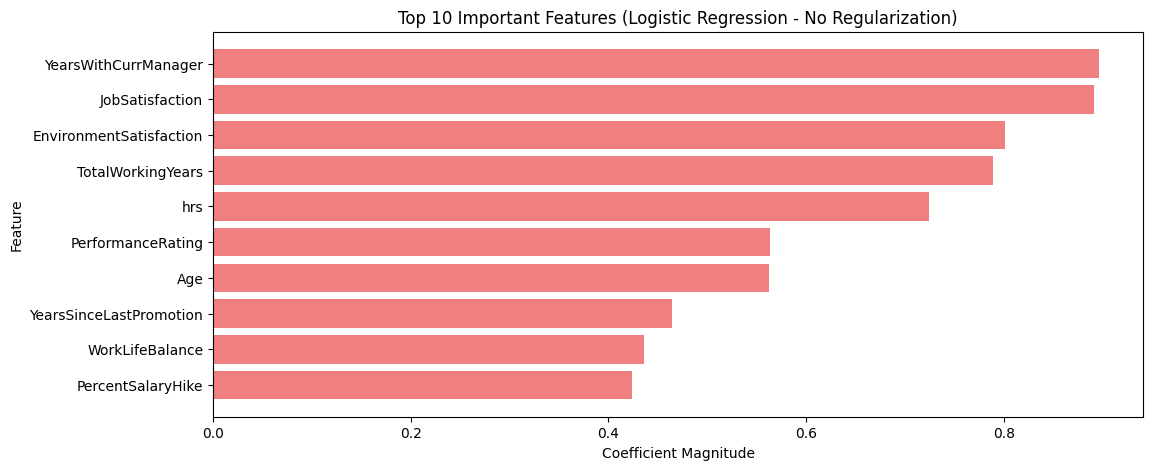

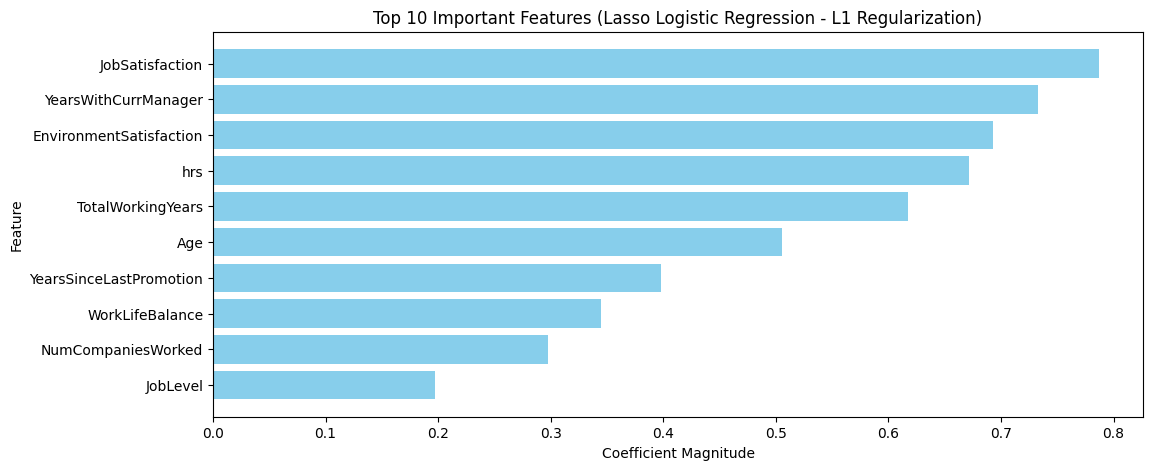

In [77]:
import numpy as np
import matplotlib.pyplot as plt

if isinstance(X_train, np.ndarray):
    feature_names = [f"Feature {i}" for i in range(X_train.shape[1])]
else:
    feature_names = X_train.columns

log_reg_coeffs = best_log_reg_model.coef_[0]  # sin regularización
lasso_log_reg_coeffs = best_lasso_log_reg_model.coef_[0]  # L1 regularización

# valores absolutos para la importancia
log_reg_importance = np.abs(log_reg_coeffs)
lasso_log_reg_importance = np.abs(lasso_log_reg_coeffs)
feature_importance_log_reg = dict(zip(feature_names, log_reg_importance))
feature_importance_lasso_log_reg = dict(zip(feature_names, lasso_log_reg_importance))

# ordenar los atributos según su importancia
sorted_log_reg_importance = sorted(feature_importance_log_reg.items(), key=lambda x: x[1], reverse=True)
sorted_lasso_log_reg_importance = sorted(feature_importance_lasso_log_reg.items(), key=lambda x: x[1], reverse=True)

# elegir los 10 mejores
top_features_log_reg = sorted_log_reg_importance[:10]
top_features_lasso_log_reg = sorted_lasso_log_reg_importance[:10]
features_log, importance_log = zip(*top_features_log_reg)
features_lasso, importance_lasso = zip(*top_features_lasso_log_reg)

# plot sin regularización
plt.figure(figsize=(12, 5))
plt.barh(features_log, importance_log, color='lightcoral')
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Logistic Regression - No Regularization)")
plt.gca().invert_yaxis()
plt.show()

# plot con regularización de L1
plt.figure(figsize=(12, 5))
plt.barh(features_lasso, importance_lasso, color='skyblue')
plt.xlabel("Coefficient Magnitude")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Lasso Logistic Regression - L1 Regularization)")
plt.gca().invert_yaxis()
plt.show()


In [96]:
print("Evaluación del modelo final con outer:")

# Evaluate Best Logistic Regression (No Regularization) on Outer Test Set
y_outer_pred_best_log = best_log_reg.predict(X_outer_test)
print_metrics(y_outer_test, y_outer_pred_best_log, label="Final Logistic Regression (Outer)")

# Evaluate Best Lasso Logistic Regression (L1) on Outer Test Set
y_outer_pred_best_lasso = best_lasso_log_reg.predict(X_outer_test)
print_metrics(y_outer_test, y_outer_pred_best_lasso, label="Final Lasso Logistic Regression (Outer)")


Evaluación del modelo final con outer:

[Final Logistic Regression (Outer)]
Overall Accuracy: 0.8541
Balanced Accuracy: 0.5986
True Positive Rate (TPR): 0.2215
True Negative Rate (TNR): 0.9757
Confusion Matrix:
 [[802  20]
 [123  35]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       822
         Yes       0.64      0.22      0.33       158

    accuracy                           0.85       980
   macro avg       0.75      0.60      0.62       980
weighted avg       0.83      0.85      0.82       980


[Final Lasso Logistic Regression (Outer)]
Overall Accuracy: 0.8592
Balanced Accuracy: 0.5914
True Positive Rate (TPR): 0.1962
True Negative Rate (TNR): 0.9866
Confusion Matrix:
 [[811  11]
 [127  31]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       822
         Yes       0.74      0.20      0.31       158

    accuracy            

El TPR muy bajo puede indicar que los modelos lineales no son los mejores para este problema de clasificación. Para los datos de outer, se desempeña aún más peor cuando trata de identificar los casos positivos.

SVMs:

# Resultados y Modelo Final

Modelo Final de Arboles:

In [101]:
# ÁRBOLES: Evaluación del modelo final con outer
print("ÁRBOLES: Evaluación del modelo final con outer:")
y_outer_pred = best_model.predict(X_outer_test)
cm_outer = confusion_matrix(y_outer_test, y_outer_pred)
TN, FP, FN, TP = cm_outer.ravel()
TPR = TP / (TP + FN) if (TP + FN) > 0 else 0.0
TNR = TN / (TN + FP) if (TN + FP) > 0 else 0.0

print(f"Overall Accuracy: {accuracy_score(y_outer_test, y_outer_pred):.4f}")
print(f"Balanced Accuracy: {balanced_accuracy_score(y_outer_test, y_outer_pred):.4f}")
print(f"True Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print("Confusion Matrix:\n", cm_outer)
print("Classification Report:\n", classification_report(y_outer_test, y_outer_pred))

ÁRBOLES: Evaluación del modelo final con outer:
Overall Accuracy: 0.8806
Balanced Accuracy: 0.7576
True Positive Rate (TPR): 0.5759
True Negative Rate (TNR): 0.9392
Confusion Matrix:
 [[772  50]
 [ 67  91]]
Classification Report:
               precision    recall  f1-score   support

          No       0.92      0.94      0.93       822
         Yes       0.65      0.58      0.61       158

    accuracy                           0.88       980
   macro avg       0.78      0.76      0.77       980
weighted avg       0.88      0.88      0.88       980



Modelo Final de Modelos Lineales:

In [103]:
# MODELOES LINEALES: Evaluación del modelo final con outer
print("MODELOES LINEALES: Evaluación del modelo final con outer:")

# sin regularización
y_outer_pred_best_log = best_log_reg.predict(X_outer_test)
print_metrics(y_outer_test, y_outer_pred_best_log, label="Final Logistic Regression")

# con regularización L1
y_outer_pred_best_lasso = best_lasso_log_reg.predict(X_outer_test)
print_metrics(y_outer_test, y_outer_pred_best_lasso, label="Final Lasso Logistic Regression")

MODELOES LINEALES: Evaluación del modelo final con outer:

[Final Logistic Regression]
Overall Accuracy: 0.8541
Balanced Accuracy: 0.5986
True Positive Rate (TPR): 0.2215
True Negative Rate (TNR): 0.9757
Confusion Matrix:
 [[802  20]
 [123  35]]
Classification Report:
               precision    recall  f1-score   support

          No       0.87      0.98      0.92       822
         Yes       0.64      0.22      0.33       158

    accuracy                           0.85       980
   macro avg       0.75      0.60      0.62       980
weighted avg       0.83      0.85      0.82       980


[Final Lasso Logistic Regression]
Overall Accuracy: 0.8592
Balanced Accuracy: 0.5914
True Positive Rate (TPR): 0.1962
True Negative Rate (TNR): 0.9866
Confusion Matrix:
 [[811  11]
 [127  31]]
Classification Report:
               precision    recall  f1-score   support

          No       0.86      0.99      0.92       822
         Yes       0.74      0.20      0.31       158

    accuracy         

# Tarea de Elección Abierta

Random Forest: Elegimos este modelo para nuestra tarea de elección abierta porque Random Forest es una buena opcion para evitar "overfitting," que es un problema que enfrentamos mucho a través de la práctica.


Evaluating Model on Training Data:
Balanced Accuracy (Train): 0.9740
Overall Accuracy (Train): 0.9915
True Positive Rate (TPR) (Train): 0.9479
True Negative Rate (TNR) (Train): 1.0000

Confusion Matrix (Train):
[[1968    0]
 [  20  364]]

Classification Report (Train):
              precision    recall  f1-score   support

          No       0.99      1.00      0.99      1968
         Yes       1.00      0.95      0.97       384

    accuracy                           0.99      2352
   macro avg       0.99      0.97      0.98      2352
weighted avg       0.99      0.99      0.99      2352





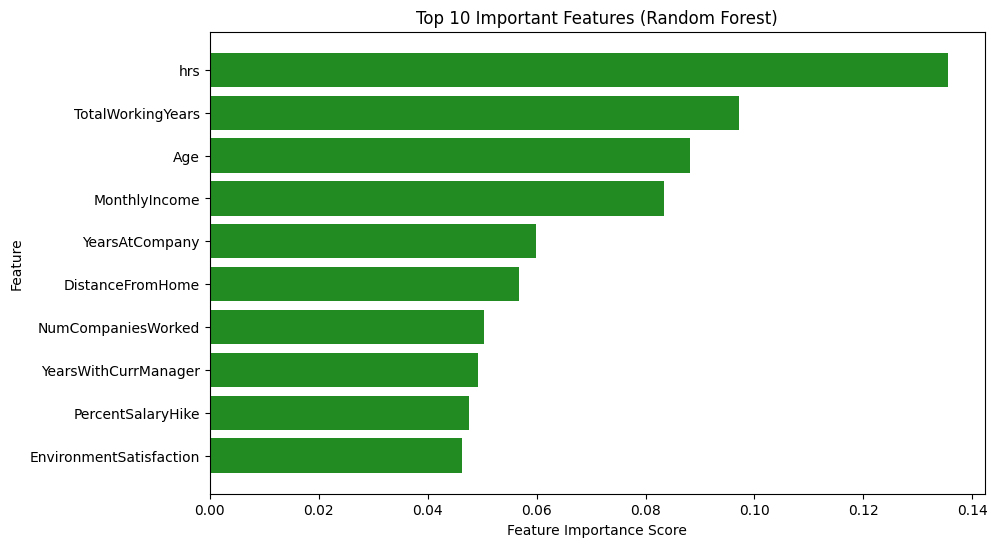

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, balanced_accuracy_score, confusion_matrix, classification_report
)
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# solo los atributos numéricos
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# elige los atributos "x" y "y"
X = df[numerical_columns]
y = df['Attrition']  # target

# dividir los datos entre train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=559990)

# pipeline con escalado
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(max_depth=12, random_state=559990))
])

# entrener el modelo
pipeline.fit(X_train, y_train)

# predecir
y_train_pred = pipeline.predict(X_train)

# evaluar el modelo
print("\nEvaluating Model on Training Data:")
evaluate_model_train(pipeline, X_train, y_train)

# la importancia de los atributos
importances = pipeline.named_steps['rf'].feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# un gráfico de los 10 mejores atributoes
plt.figure(figsize=(10, 6))
top_features = feature_importance_df.head(10)
plt.barh(top_features['Feature'], top_features['Importance'], color='forestgreen')
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title("Top 10 Important Features (Random Forest)")
plt.gca().invert_yaxis()
print("\n")
plt.show()

# Declaración de la IA

Una gran contribución de la IA en esta práctica es la herramienta de "dubugging" que oferece.